In [104]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [118]:
heart=pd.read_csv("heart.csv")

In [119]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [107]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [108]:
heart.corr()
#this data seems good bec multicollinearity btw the variables seems very low

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [ ]:
# I was curious to know if there's any correlation btw cholestrol levels and age 
# but the collineraity seems very low


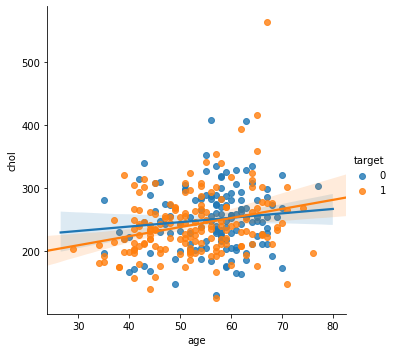

In [242]:
sns.lmplot(x="age",y="chol",data=heart,hue="target")

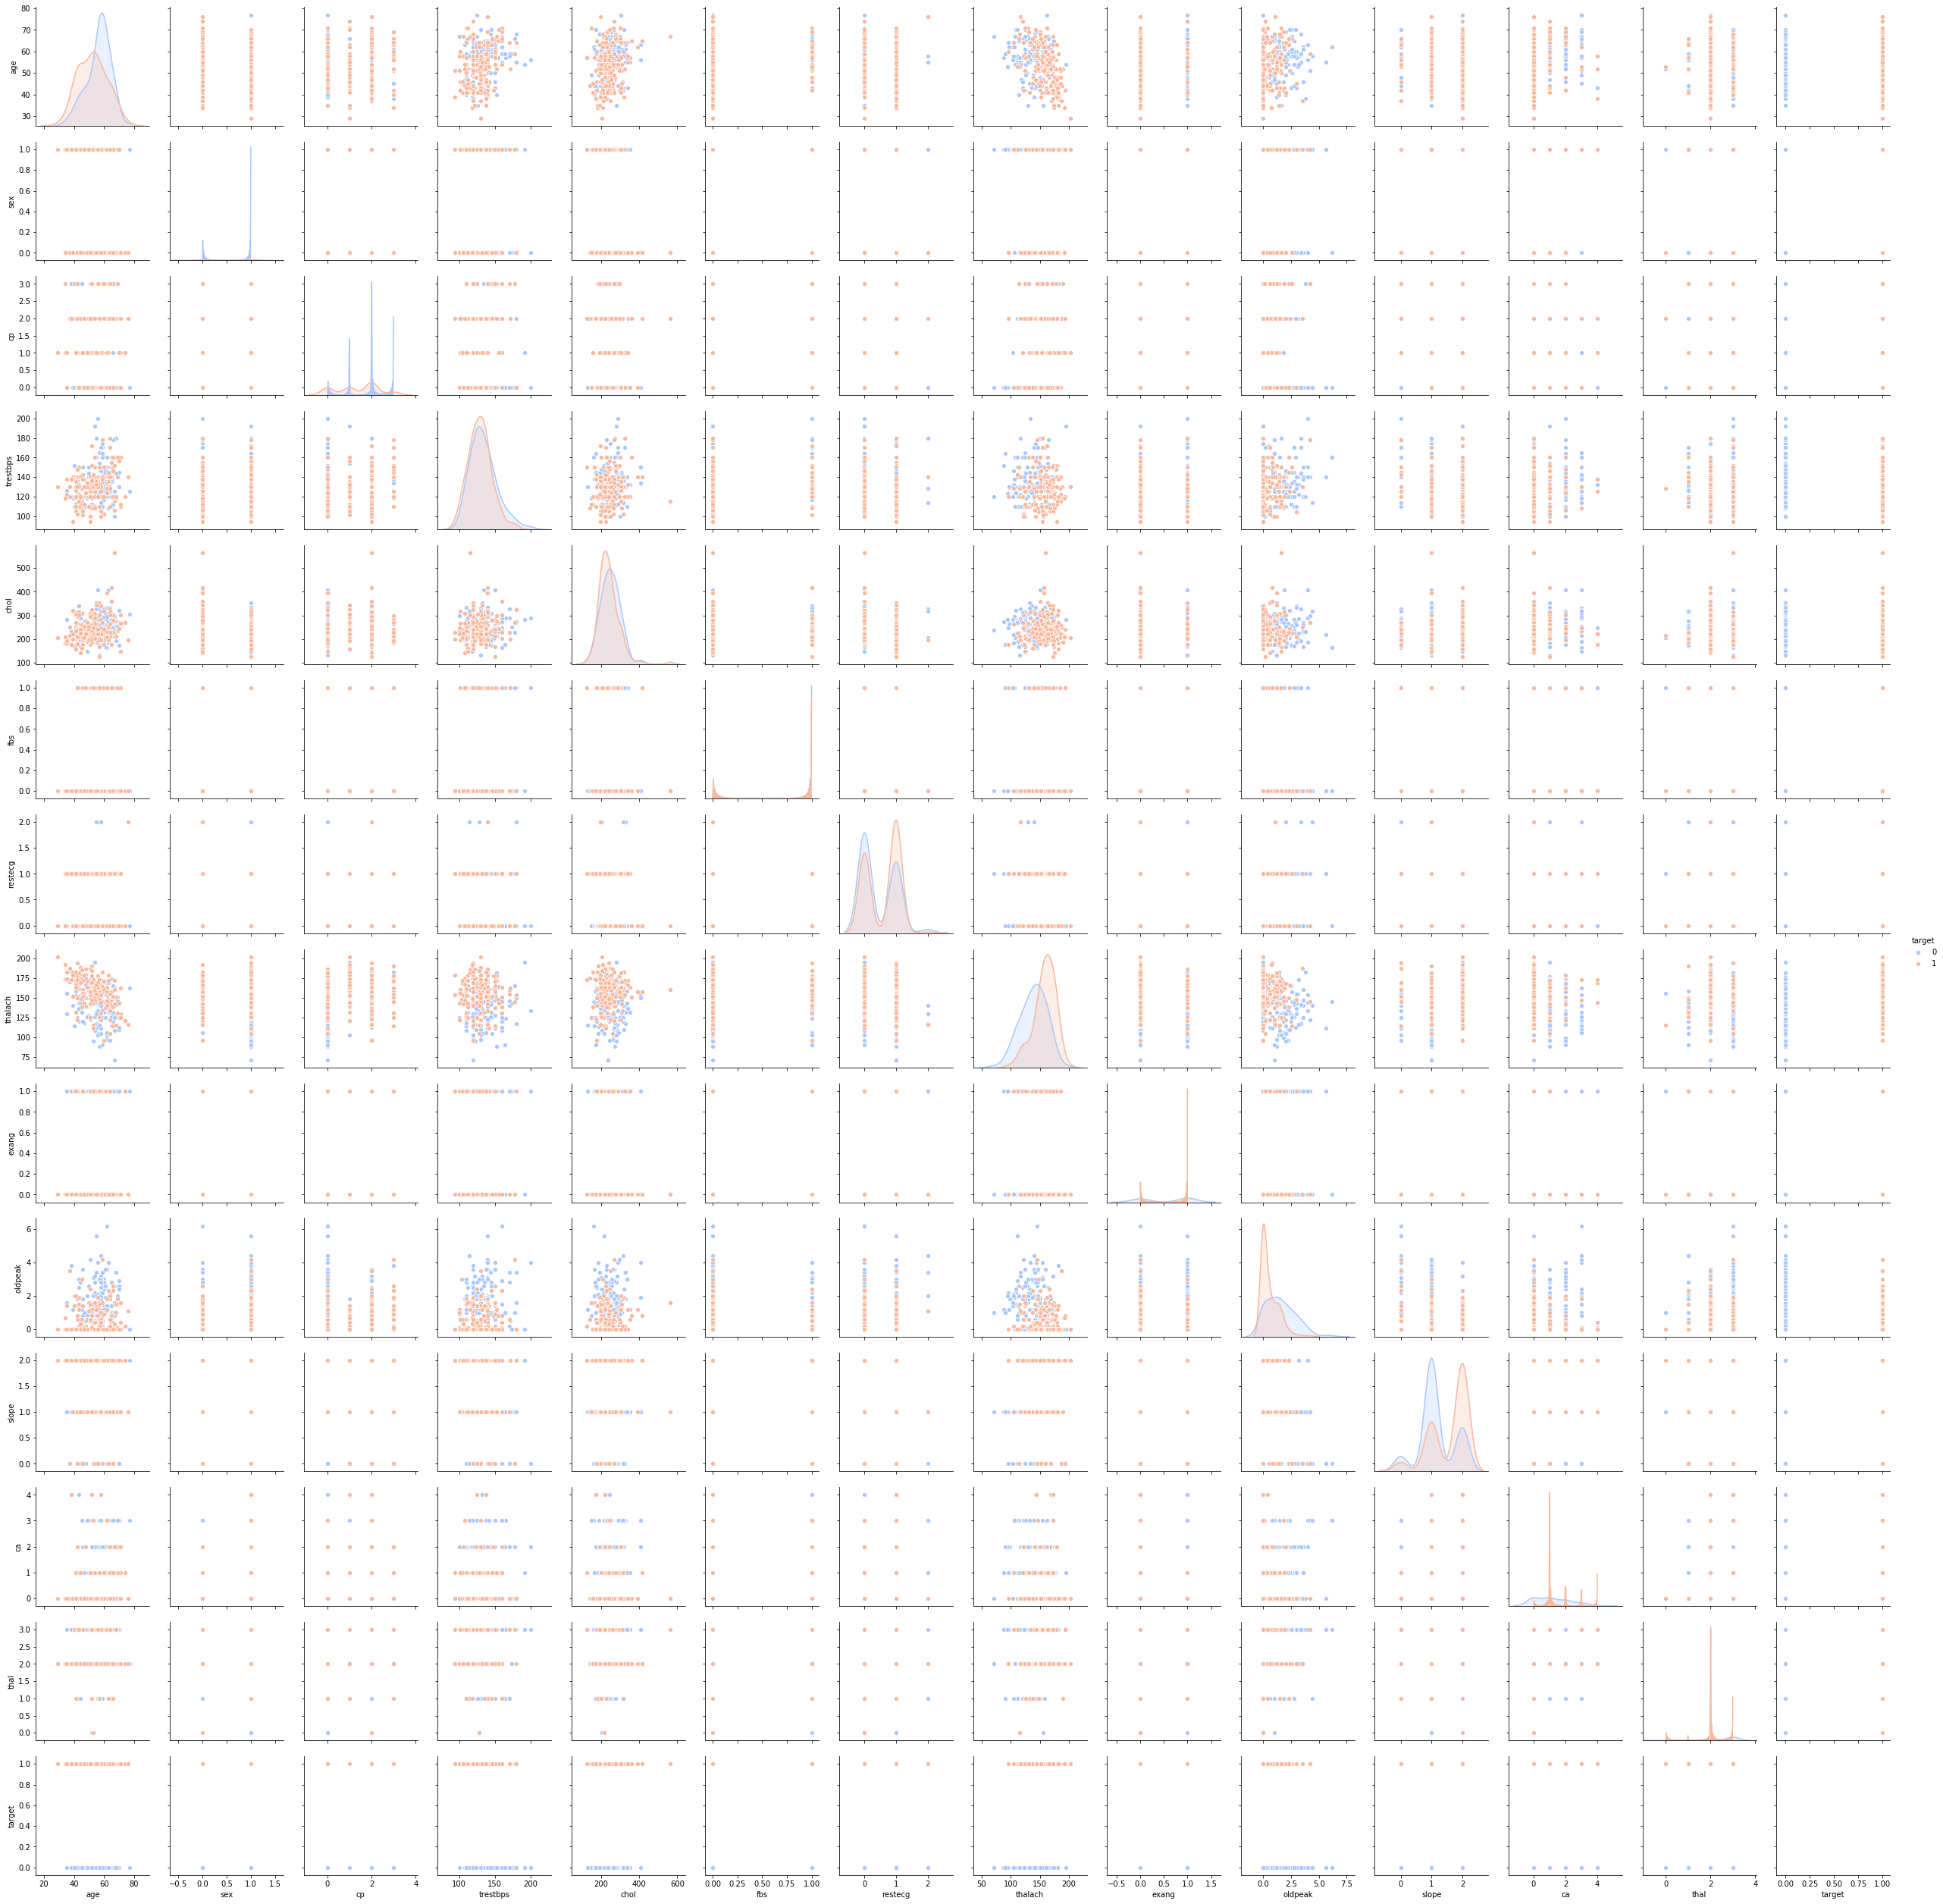

In [246]:
sns.pairplot(heart,palette="coolwarm",hue="target")

In [215]:
a = pd.get_dummies(heart['cp'],prefix="cp")
b = pd.get_dummies(heart['thal'],prefix="thal")
c = pd.get_dummies(heart['slope'],prefix="slope")
new=[heart,a,b,c]
xheart=pd.concat(new,axis=1)
xheart.drop(["cp","thal","slope"],axis=1,inplace=True)
xheart.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,...,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,...,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,...,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,...,0,0,0,0,0,1,0,0,0,1


In [216]:
xheart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 22 columns):
age         303 non-null int64
sex         303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
ca          303 non-null int64
target      303 non-null int64
cp_0        303 non-null uint8
cp_1        303 non-null uint8
cp_2        303 non-null uint8
cp_3        303 non-null uint8
thal_0      303 non-null uint8
thal_1      303 non-null uint8
thal_2      303 non-null uint8
thal_3      303 non-null uint8
slope_0     303 non-null uint8
slope_1     303 non-null uint8
slope_2     303 non-null uint8
dtypes: float64(1), int64(10), uint8(11)
memory usage: 29.4 KB


In [217]:
from sklearn.preprocessing import StandardScaler

In [218]:
scaler=StandardScaler()

In [219]:
scaler.fit(xheart.drop("target",axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [220]:
scaled_features=scaler.transform(xheart.drop("target",axis=1))

In [221]:
df=pd.DataFrame(scaled_features,columns=xheart.drop("target",axis=1).columns[0:22])

In [222]:
xheart.drop("target",axis=1).columns[0:22]

Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang',
       'oldpeak', 'ca', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'thal_0', 'thal_1',
       'thal_2', 'thal_3', 'slope_0', 'slope_1', 'slope_2'],
      dtype='object')

In [223]:
from sklearn.model_selection import train_test_split

In [224]:
X=df

In [225]:
y=heart["target"]


In [226]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [227]:
from sklearn.neighbors import KNeighborsClassifier

In [228]:
knn=KNeighborsClassifier(n_neighbors=13)

In [229]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')

In [230]:
pred=knn.predict(X_test)

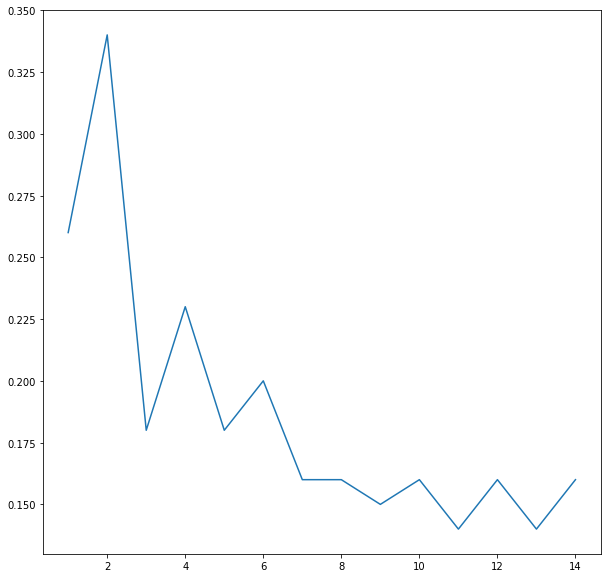

In [231]:
error_rate=[]
for i in range(1,15):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    error_rate.append(np.mean(pred_i!=y_test))
plt.figure(figsize=(10,10))
plt.plot(range(1,15,1),error_rate)

In [232]:
from sklearn.metrics import accuracy_score 

In [233]:
accuracy_score(y_test, pred)

0.86